In [1]:
import numpy as np
import matplotlib.pyplot as plt

import neural_network.network as network
import neural_network.synthetic_data as sd
import tests.test_network as tn
from neural_network.scaling import Scale


%matplotlib inline

In [2]:
synth = sd.Synthesizer([
    # 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23
    0,   0, 0, 0, 0, 0, 0, 5, 5,10, 10, 10, 15, 15, 10, 10, 10,  5,  5,  5,  0,  0,  0,  0,   # Mon
    0,   0, 0, 0, 0, 0, 0, 5, 5,10, 10, 10, 15, 15, 10, 10, 10,  5,  5,  5,  0,  0,  0,  0,   # Tue
    0,   0, 0, 0, 0, 0, 0, 5, 5,10, 10, 10, 15, 15, 10, 10, 10,  5,  5,  5,  0,  0,  0,  0,   # Wed
    0,   0, 0, 0, 0, 0, 0, 5, 5,10, 10, 10, 15, 15, 10, 10, 10,  5,  5,  5,  0,  0,  0,  0,   # Thu
    0,   0, 0, 0, 0, 0, 0, 5, 5,10, 10, 10, 15, 15, 10, 10, 10,  5,  5,  5,  0,  0,  0,  0,   # Fri
    0,   0, 0, 0, 0, 0, 0, 0, 0, 5,  5,  5,  5, 10,  5,  5,  5,  0,  0,  0,  0,  0,  0,  0,   # Sat
    0,   0, 0, 0, 0, 0, 0, 0, 0, 5,  5,  5,  5, 10,  5,  5,  5,  0,  0,  0,  0,  0,  0,  0,   # Sun
])
w_in, w_out, w_size = 4, 1, 7*24

In [3]:
stdev, seed = 0.5, 1
data = synth.generate(stdev, seed, 52)
inputs, outputs = sd.bucketize(data, w_in, w_out, w_size)

In [4]:
alpha, num_iterations, num_neurons, bias = 0.005, 5*1000, 24, True
nn, predictions, num_training, error_all = tn.train_and_test_nn(inputs, outputs, alpha, num_iterations, num_neurons, bias)

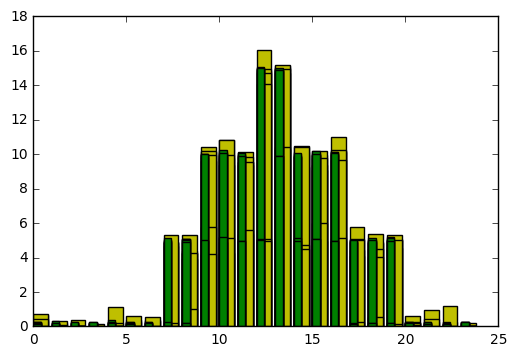

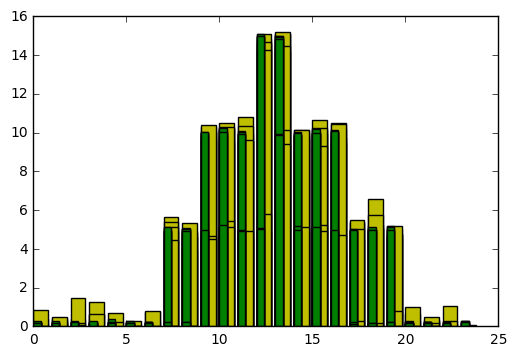

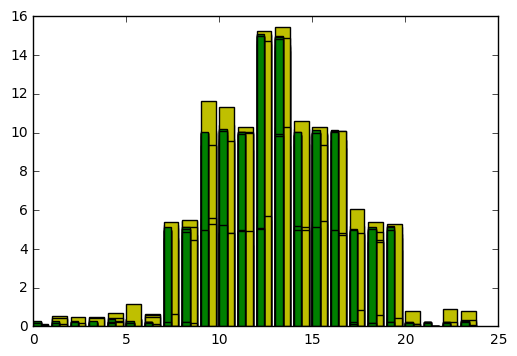

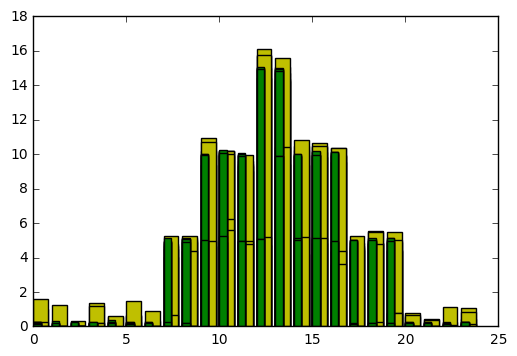

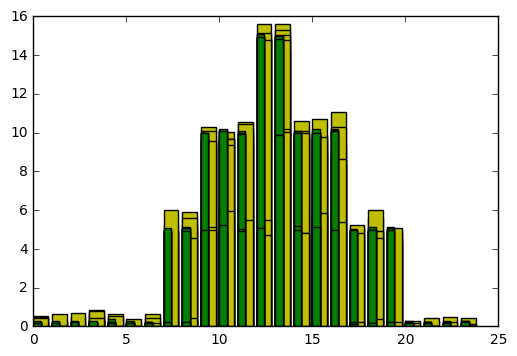

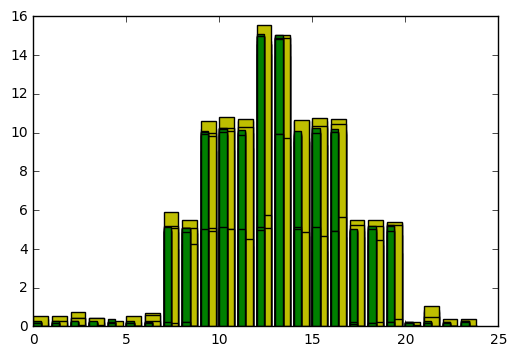

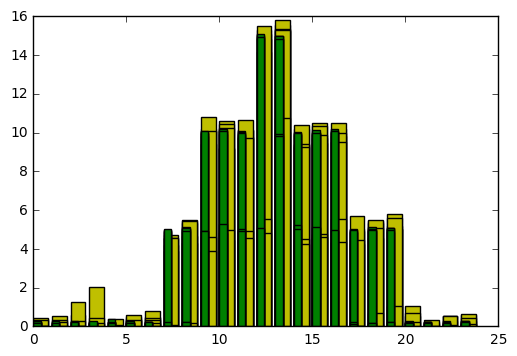

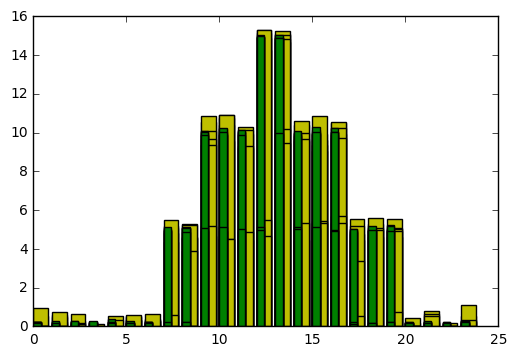

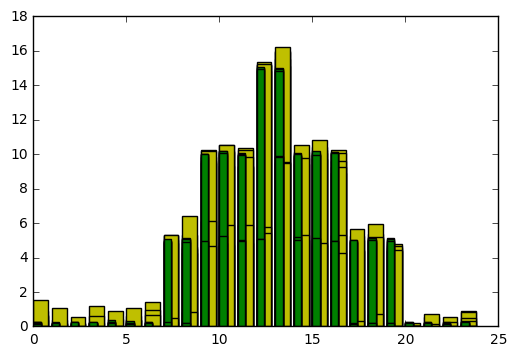

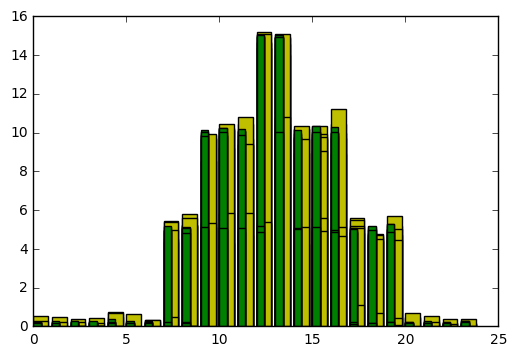

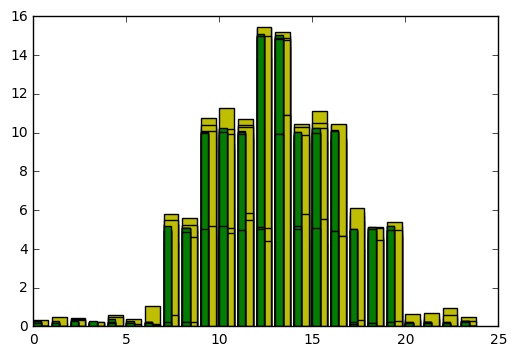

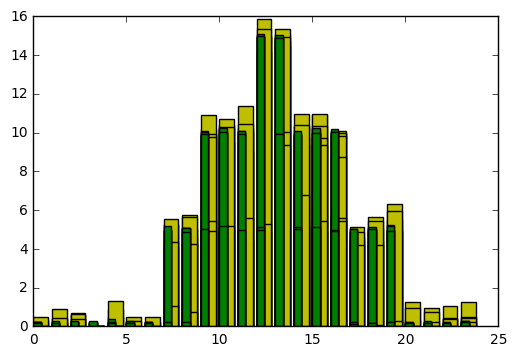

In [5]:
%matplotlib inline
xh = np.array([x for x in range(24)] * 7)

for w in range (num_training, len(predictions)):
    expected = outputs[w]
    predicted = predictions[w]
    plt.bar(xh, expected,0.8, color='y')
    plt.bar(xh, predicted,0.4, color='g')
    plt.show()

In [6]:
error_training = error_all[:num_training]
avg_train_error = np.mean(np.abs(error_training))

error_test = error_all[num_training:]
avg_test_error = np.mean(np.abs(error_test))

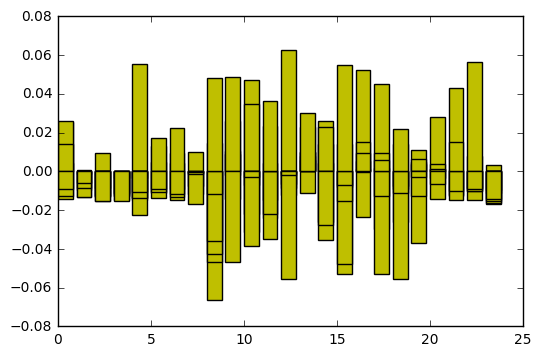

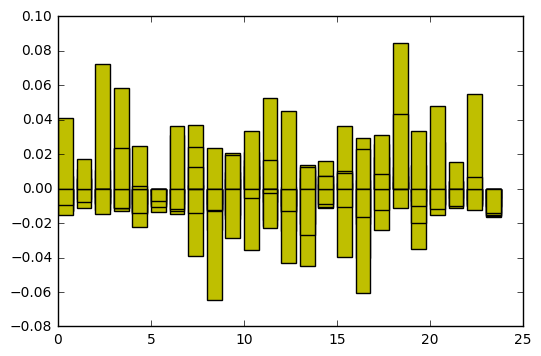

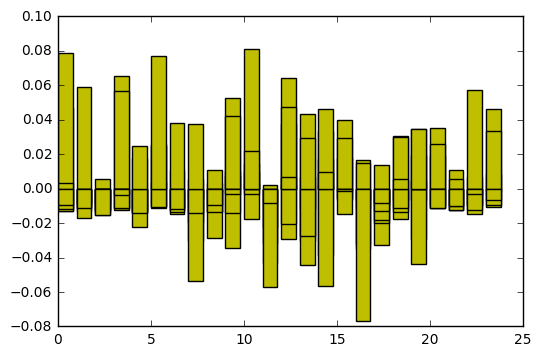

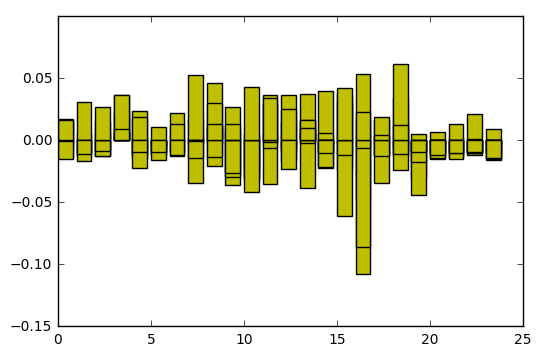

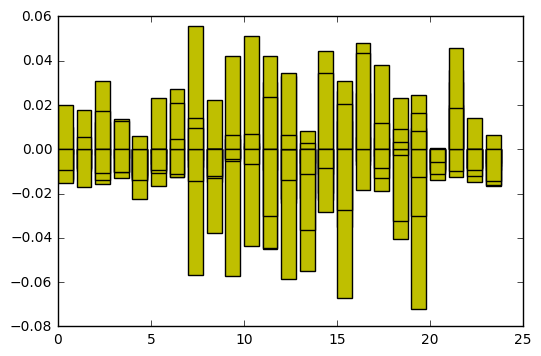

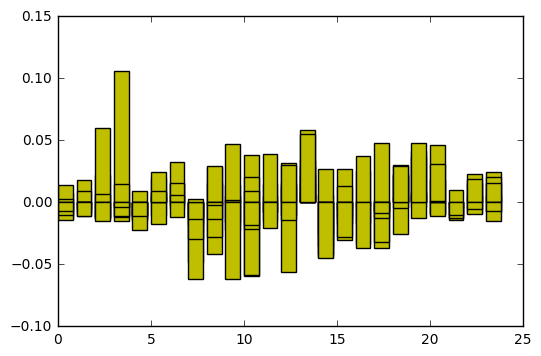

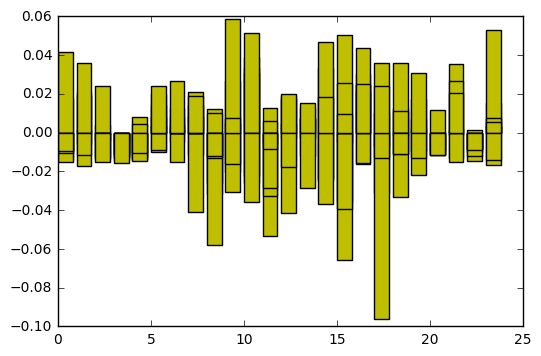

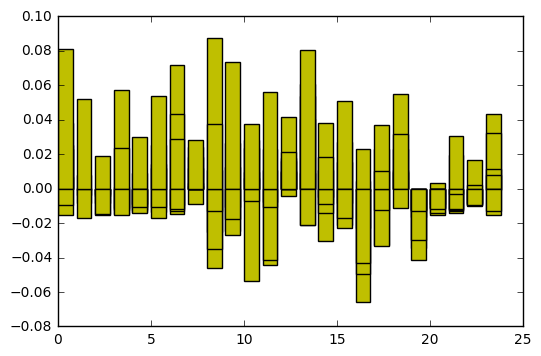

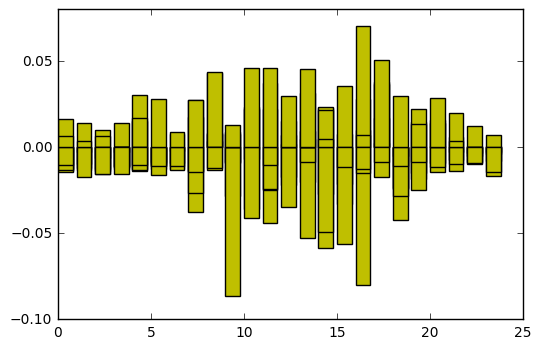

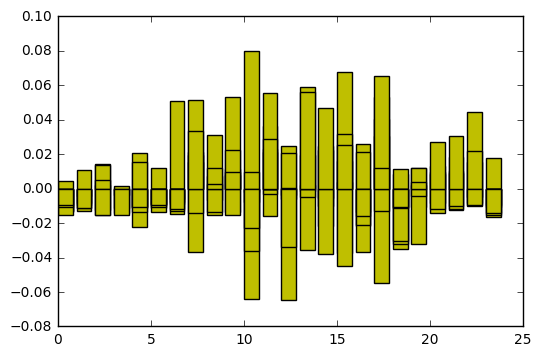

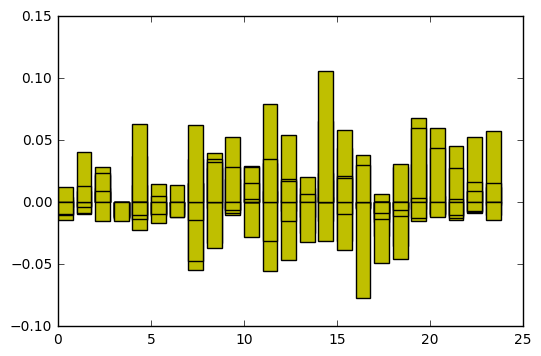

In [7]:
%matplotlib inline
for w in range (len(error_test)):
    plt.bar(xh, error_test[w], 0.8, color='y')
    plt.show()

In [8]:
weekly_avg_test_error = np.array([np.mean(np.abs(error_test[w])) for w in range(len(error_test))])
with plt.xkcd():
    plt.title('Average absolute % error by week')
    plt.bar(range(len(error_test)), weekly_avg_test_error * 100, color='red')